In [1]:
from caveclient import CAVEclient
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
client = CAVEclient(global_only=True)

In [3]:
# https://annotationframeworkclient.readthedocs.io/en/stable/guide/authentication.html#new-token
client = CAVEclient('minnie65_phase3_v1')
client.info.get_datastack_info()

{'description': 'This is the first version of Minnie that has proofreading enabled. Was first enabled on June 24, 2020. ',
 'analysis_database': None,
 'aligned_volume': {'image_source': 'precomputed://https://bossdb-open-data.s3.amazonaws.com/microns/minnie/minnie65-phase3-em/aligned/v1',
  'description': "This is the second alignment of the IARPA 'minnie65' dataset, completed in the spring of 2020 that used the seamless approach.",
  'name': 'minnie65_phase3',
  'id': 1},
 'local_server': 'https://minnie.microns-daf.com',
 'synapse_table': 'synapses_pni_2',
 'viewer_site': 'http://neuromancer-seung-import.appspot.com/',
 'segmentation_source': 'graphene://https://minnie.microns-daf.com/segmentation/table/minnie3_v1',
 'soma_table': 'nucleus_neuron_svm'}

In [4]:
#client.auth.get_new_token()

In [5]:
# "the token is saved to ~/.cloudvolume/secrets/chunkedgraph-secret.json as a string under the key token"
# pls don't regenerate
#client.auth.save_token(token="cbf0c535f12057f40e895d1d04dcf79e",overwrite=True)

In [6]:
client.materialize.get_tables()

['functional_coreg',
 'proofreading_functional_coreg_v2',
 'allen_v1_column_thalamic',
 'l5_mc_cg',
 'allen_v1_column_pyc_proof',
 'synapses_pni_2',
 'allen_v1_column_types_slanted',
 'allen_minnie_extra_types',
 'nucleus_detection_v0',
 'allen_v1_column_types_v3',
 'allen_v1_column_types_v2',
 'allen_v1_column_proofreading',
 'nucleus_neuron_svm',
 'allen_soma_coarse_cell_class_model_v2',
 'allen_column_l5it_types',
 'allen_column_basket_molecular',
 'allen_column_bodor_surround_inhib',
 'proofreading_status_public_release',
 'func_unit_em_match_release',
 'allen_soma_coarse_cell_class_model_v1']

In [7]:
client.materialize.get_table_metadata('allen_soma_coarse_cell_class_model_v1')

{'aligned_volume': 'minnie65_phase3',
 'valid': True,
 'created': '2021-05-07T04:38:20.659846',
 'id': 562,
 'table_name': 'allen_soma_coarse_cell_class_model_v1',
 'schema': 'cell_type_local',
 'user_id': '121',
 'reference_table': '',
 'voxel_resolution_x': 4.0,
 'voxel_resolution_z': 40.0,
 'schema_type': 'cell_type_local',
 'description': 'This is a model developed by Leila Elabbady and Forrest Collman, it uses features extracted from the somatic region and nucleus segmentation (developed in collaboration with Shang Mu and Gayathri Mahalingam).  Those features included the number of soma synapses, the somatic area, the somatic area to volume ratio, the density of somatic synapses, teh volume of the soma, the depth in cortex of the cell (based upon the y coordinate after a 5 degree rotation), the nucleus area, the ratio of the nucleus area to nucleus volume, the average diameter of the proximal processes of the cell,  the area of the nucleus with a fold, the fraction of the nucleus 

In [8]:
client.materialize.get_table_metadata('nucleus_neuron_svm')

{'aligned_volume': 'minnie65_phase3',
 'valid': True,
 'created': '2020-11-12T22:38:01.869172',
 'id': 38,
 'table_name': 'nucleus_neuron_svm',
 'schema': 'cell_type_local',
 'user_id': '121',
 'reference_table': '',
 'voxel_resolution_x': 4.0,
 'voxel_resolution_z': 40.0,
 'schema_type': 'cell_type_local',
 'description': 'This table contains a prediction about what nucleus detections are neurons and which are likely not neurons.  This is based upon a model trained by Leila Elabbady (Allen Institute) on nucleus segmentations in Basil, processed for features such as volume, foldedness, location in cortex, etc, and applied to Minnie65.  In Basil the model had a cross validated f1 score of .97 and a recall of .97 for neurons.  Manual validation performed on a column of 1316 nuclei in Minnie65 measured a recall of .996 and a precision of .969. ',
 'flat_segmentation_source': 'precomputed://https://seungdata.princeton.edu/minnie65-phase3-ws/nuclei/v0/seg',
 'voxel_resolution_y': 4.0}

    Summary:
    
    - allen_v1_column_types_slanted have been manually examined for cell type

    - synapses_pni_2 is a table of the locations of a target cell's synapse according to its input cell

    - allen_soma_coarse_cell_class_model_v1 and v2 is 99% pre-proofread and has the location of all cell bodies in the dataset - difference is that v1 has specific cell types, while v2 is just excitatory/inhibitory

    - nucleus_neuron_svm is a table where each row represents a soma

    positions can be copied n pasted into neuroglancer!
    
In order to access these tables, query_table will download the whole thing, unless any of the 3 filters are applied:

- filter_equal_dict : returns a row only if it contains specified value
- filter_in_dict : returns a row only if its value is within allowed constraint
- filter_not_in_dict : returns a row only if its value is NOT within allowed constraint

further, you can use select_columns = ['id','pre_pt_root_id', 'pre_pt_position'] if you only want those columns, and split_columns=True if you want position to be split into x, y, and z columns (and recombined with concatenate_position_columns())

In [9]:
#materialization engine - v120 most recent - 1 exact timestamp
df = client.materialize.query_table('allen_v1_column_types_slanted')
#client.materialize.query_table? #- a fun way to get info about panda command + args 
df[0:3]

/usr/local/Caskroom/miniconda/base/envs/brain/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: 'pyarrow.deserialize' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,2,t,aibs_coarse_excitatory,6P,91714732578520135,864691135969106021,"[195744, 241616, 22156]"
1,3,t,aibs_coarse_excitatory,6P,91083063282935716,864691135517345674,"[191408, 253760, 23510]"
2,4,t,aibs_coarse_excitatory,6P,89954208371187610,864691136989929621,"[182912, 232112, 22720]"


In [10]:
np.unique(df.classification_system)

array(['aibs_coarse_excitatory', 'aibs_coarse_inhibitory',
       'aibs_coarse_unclear'], dtype=object)

### Cell type key:

    Number refers to layer, P refers to pyramidal (broadly), IT = intertelencephalon

output cells =
- NP = near-projecting (spooky) (spider) (im scared)
- PT = pyramidal tract
- CT = cortico-thalamic, projects to the thalamus (sensory->thalamus->cortex->loops)
- BC = basket-cell (primarily target the cell body of excitatory neurons), strategically positioned to control spiking and strongly interconnected
- BPC = bipolar cell (VIP = molecular term, dendrites goin up n down) (controls SST) (only some target E), 15% of all interneurons, gain control
- MC = Martinotti (SST = molec term) (primary source of inhib.) targetting distill dendrites & apocal dend., powerful boys, project to layer 1 mediate di-synaptic inhibition between neighboring pyramidal cells
- NGC = neurogliaform cell (instead of pre/post-synaptic, they do volume transmission) spewing GABA, no specific target, (meh categorization)

In [11]:
np.unique(df.cell_type)

array(['23P', '4P', '5P_IT', '5P_NP', '5P_PT', '6CT', '6IT', '6P', 'BC',
       'BPC', 'MC', 'NGC', 'Unsure'], dtype=object)

## Working with a Starter Neuron

    We'll be using a basket cell, as they are well-proofread with a large axon.

In [12]:
root_id = [864691135428608048]
boy = df.query("pt_root_id in @root_id")
boy

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
1317,1341,t,aibs_coarse_inhibitory,BC,89589376669051726,864691135428608048,"[180752, 135200, 22612]"


    Now to look for all cells where the pre-synaptic partner has the same root_id as our start cell...

In [13]:
syn = client.materialize.query_table('synapses_pni_2',filter_equal_dict={'pre_pt_root_id':root_id[0]})
syn[0:3]

/usr/local/Caskroom/miniconda/base/envs/brain/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: 'pyarrow.deserialize' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position
0,163776283,t,90008221812671631,864691135428608048,90008221812657455,864691135428664368,2016,"[183508, 110188, 22121]","[183440, 110198, 22110]","[183515, 110251, 22112]"
1,157606583,t,89171356159545056,864691135428608048,89171356159540486,864691135837469843,8736,"[177664, 166442, 23452]","[177616, 166432, 23445]","[177674, 166500, 23455]"
2,166961633,t,89939434019208858,864691135428608048,89939434019192286,864691136024075321,1684,"[183310, 122030, 25257]","[183308, 122012, 25242]","[183260, 121996, 25250]"


#### synapses table key:

- pre_pt_root_id = pre-synaptic (input cell) we selected for
- post_pt_root_id = post-synaptic cell that the queried cell connects to
- size = volume of synapse in units of supervoxels (most of the time is proportional to strength/weight)

#### synapse has 3 pts associated: 
- 1 just inside the pre-syn side of synapse (on dendrites)
- 1 is just inside the post-syn
- 1 is center point

In [14]:
unique_syn = np.unique(syn.post_pt_root_id)
print("There are {0:g} synaptic connections from {1:g} cells.".format(len(syn),len(unique_syn)))

There are 5551 synaptic connections from 2409 cells.


    Now we're going to query the nuclei table, so that we have access to the position of the somas whose dendrites have the post-synaptic connections we just found.

In [15]:
# edge-list network representation
# for each root_id, how many synapses are there?
#edgelist = syn_df.groupby([‘pre_pt_root_id’, ‘post_pt_root_id’]).count()[‘valid’]).reset_index()
#edgelist = syn_df.groupby([‘pre_pt_root_id’, ‘post_pt_root_id’]).count()[‘valid’]).reset_index().rename(columns={‘valid’: ‘num_syn’})

In [16]:
nuclei_unmasked = client.materialize.query_table('nucleus_neuron_svm')#,filter_in_dict = {'pt_root_id':unique_syn})
# new df of just neurons (no glial cells)
nuclei = nuclei_unmasked.query('cell_type == "neuron"').reset_index(drop=True)
# new column saying how many neurons have the same root_id
nuclei['num_soma'] = nuclei.groupby('pt_root_id').transform('count')['valid']
# mask the df to throw out merged nuclei (same root_id being assigned to multiple neurons)
mask_nuclei = nuclei['num_soma'] < 2
nuclei_full = nuclei[mask_nuclei].reset_index(drop=True)

/usr/local/Caskroom/miniconda/base/envs/brain/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: 'pyarrow.deserialize' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
unique_nuc = np.unique(nuclei_full.pt_root_id)
soma_full = client.materialize.query_table('allen_soma_coarse_cell_class_model_v1',filter_in_dict = {'pt_root_id':unique_nuc})
unique_soma = np.unique(soma_full.pt_root_id)

In [18]:
print(len(nuclei_full))
print(len(soma_full))

66964
59461


In [19]:
syn_nuc = syn.query("post_pt_root_id in @unique_nuc").reset_index(drop=True)
syn_soma = syn.query("post_pt_root_id in @unique_soma").reset_index(drop=True)

In [20]:
print(len(syn_nuc))
print(len(np.unique(syn_nuc.post_pt_root_id)))
print(len(syn_soma))
print(len(np.unique(syn_soma.post_pt_root_id)))

4220
1752
4132
1714


In [21]:
unique_syn_nuc = np.unique(syn_nuc.post_pt_root_id)
unique_syn_soma = np.unique(syn_soma.post_pt_root_id)

In [22]:
# don't do this - query the large table for all valid nuclei, then say whether its T/F if connected to boy
# need to query another table that actually has cell types
post_nuclei = client.materialize.query_table('allen_soma_coarse_cell_class_model_v1',filter_in_dict = {'pt_root_id':unique_syn_nuc})
post_somas = client.materialize.query_table('allen_soma_coarse_cell_class_model_v1',filter_in_dict = {'pt_root_id':unique_syn_soma})
# not many will be in here bc of proofreading stuff
post_slant = client.materialize.query_table('allen_v1_column_types_slanted',filter_in_dict = {'pt_root_id':unique_syn_soma})

In [23]:
def class_spitter(df):
    classes = np.unique(df.classification_system)
    cellarray = []
    for i in range(len(classes)):
        new = df.query(f"classification_system in @classes[{i}]")
        cellarray.append(new)
    return cellarray

def type_spitter(df):
    types = np.unique(df.cell_type)
    cellarray = []
    for i in range(len(types)):
        new = df.query(f"cell_type in @types[{i}]")
        cellarray.append(new)
    return cellarray

In [24]:
post_slant_class = class_spitter(post_slant)
post_som_class = class_spitter(post_somas)
post_nuc_class = class_spitter(post_nuclei)

post_slant_type = type_spitter(post_slant)
post_som_type = type_spitter(post_somas)
post_nuc_type = type_spitter(post_nuclei)

    "Distance in the y dimension (depth) is quite different from x and z (radial directions). For example, cell types often live specifically at a particular depth, but are scattered widely across the x and z dimensions."

In [25]:
def Eucdistance(pre,post):
    pre_pt = np.array(pre.pt_position) * 4
    x_pre,y_pre,z_pre = pre_pt[0][0],pre_pt[0][1],pre_pt[0][2]*10

    post_pt = post.pt_position.reset_index(drop=True)
    x_pos,y_pos,z_pos = np.zeros(len(post_pt)),np.zeros(len(post_pt)),np.zeros(len(post_pt))
    for i in range(len(post_pt)):
        x_pos[i] = post_pt[i][0] * 4
        y_pos[i] = post_pt[i][1] * 4
        z_pos[i] = post_pt[i][2] * 40
    
    d = np.zeros(len(post_pt))
    for i in range(len(post_pt)):
        d[i] = np.sqrt((x_pre-x_pos[i])**2 + (y_pre-y_pos[i])**2 + (z_pre-z_pos[i])**2)
    
    return d

def Raddistance(pre,post):
    pre_pt = np.array(pre.pt_position) * 4
    x_pre,z_pre = pre_pt[0][0],pre_pt[0][2]*10

    post_pt = post.pt_position.reset_index(drop=True)
    x_pos,z_pos = np.zeros(len(post_pt)),np.zeros(len(post_pt))
    for i in range(len(post_pt)):
        x_pos[i] = post_pt[i][0] * 4
        z_pos[i] = post_pt[i][2] * 40
    
    d = np.zeros(len(post_pt))
    for i in range(len(post_pt)):
        d[i] = np.sqrt((x_pre-x_pos[i])**2 + (z_pre-z_pos[i])**2)
    
    return d

def distance(pre,post):
    d,r = [],[]
    for i in range(len(post)):
        # divide by 1,000 to convert nm to microns
        d_oneclass = Eucdistance(pre,post[i])/1000.
        d.append(d_oneclass)
        r_oneclass = Raddistance(pre,post[i])/1000.
        r.append(r_oneclass)
    return d,r

In [26]:
slant_d_class,slant_r_class = distance(boy,post_slant_class)
som_d_class,som_r_class = distance(boy,post_som_class)
nuc_d_class,nuc_r_class = distance(boy,post_nuc_class)

slant_d_type,slant_r_type = distance(boy,post_slant_type)
som_d_type,som_r_type = distance(boy,post_som_type)
nuc_d_type,nuc_r_type = distance(boy,post_nuc_type)

In [27]:
total = len(slant_d_class[0])+len(slant_d_class[1])#+len(slant_d_class[2])
print("{0:.2%} of proofread post-synaptic partners are excitatory,".format(len(slant_d_class[0])/total))
print("{0:.2%} are inhibitory.\n".format(len(slant_d_class[1])/total))
#print("{0:.2%} are unknown.\n".format(len(slant_d_class[2])/total))

total_som = len(som_d_class[0])+len(som_d_class[1])
print("{0:.2%} of un-proofread post-synaptic partners are excitatory,".format(len(som_d_class[0])/total_som))
print("{0:.2%} are inhibitory. (from soma table)\n".format(len(som_d_class[1])/total_som))

total_nuc = len(nuc_d_class[0])+len(nuc_d_class[1])
print("{0:.2%} of un-proofread post-synaptic partners are excitatory,".format(len(nuc_d_class[0])/total_nuc))
print("{0:.2%} are inhibitory. (from nucleus table)".format(len(nuc_d_class[1])/total_nuc))

88.99% of proofread post-synaptic partners are excitatory,
11.01% are inhibitory.

87.46% of un-proofread post-synaptic partners are excitatory,
12.54% are inhibitory. (from soma table)

87.46% of un-proofread post-synaptic partners are excitatory,
12.54% are inhibitory. (from nucleus table)


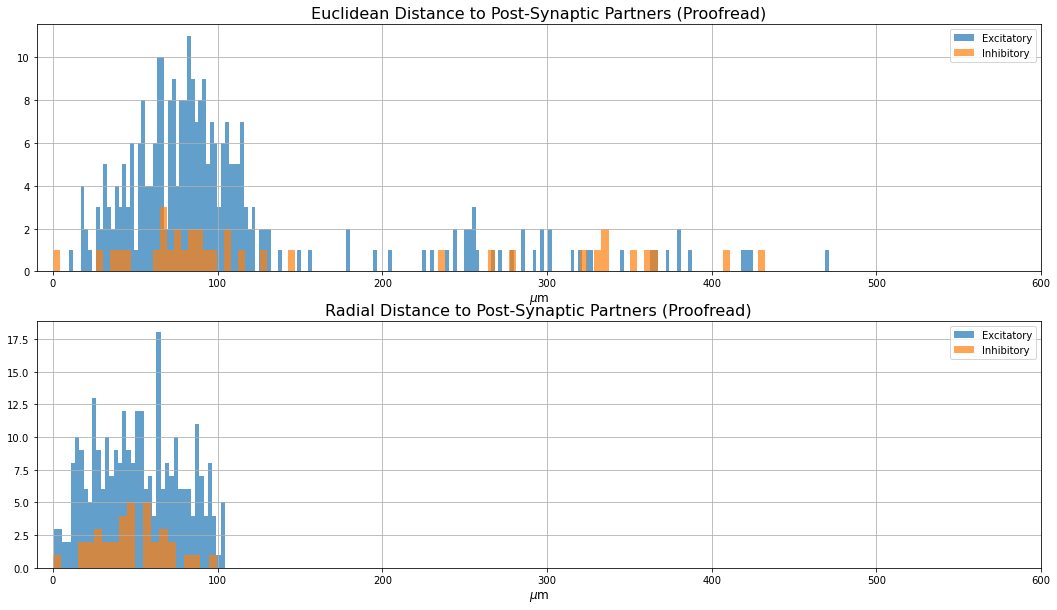

In [28]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18,10)

ax[0].hist(slant_d_class[0], 200, density=False, label='Excitatory', alpha=.7)
ax[0].hist(slant_d_class[1], 100, density=False, label='Inhibitory', alpha=.7)
ax[0].set_title("Euclidean Distance to Post-Synaptic Partners (Proofread)", fontsize=16)
ax[0].set_xlabel(r'$\mu$m', fontsize=12)
ax[0].legend()
ax[0].grid()

ax[1].hist(slant_r_class[0], 40, density=False, label='Excitatory', alpha=.7)
ax[1].hist(slant_r_class[1], 20, density=False, label='Inhibitory', alpha=.7)
ax[1].set_title("Radial Distance to Post-Synaptic Partners (Proofread)", fontsize=16)
ax[1].set_xlabel(r'$\mu$m', fontsize=12)
ax[1].legend()
ax[1].grid()

#ax[1].set_ylabel("Log Frequency", fontsize=16)
#ax[1].set_yscale('log')

ax[0].set_xlim(-10,600)
ax[1].set_xlim(-10,600)
plt.show()

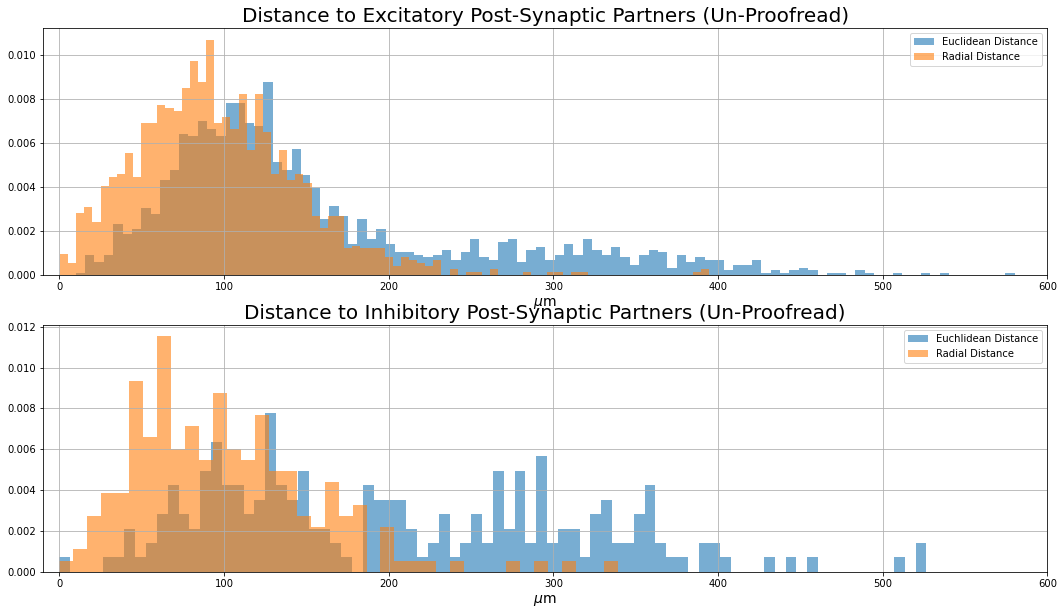

In [29]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18,10)

ax[0].hist(nuc_d_class[0], 100, label='Euclidean Distance', density=True, alpha=0.6)
ax[0].hist(nuc_r_class[0], 80, label='Radial Distance', density=True, alpha=0.6)
ax[0].set_title("Distance to Excitatory Post-Synaptic Partners (Un-Proofread)", fontsize=20)
ax[0].set_xlabel(r'$\mu$m', fontsize=14)
ax[0].legend()
ax[0].grid()

ax[1].hist(nuc_d_class[1], 80, label='Euchlidean Distance', density=True, alpha=0.6)
ax[1].hist(nuc_r_class[1], 40, label='Radial Distance', density=True, alpha=0.6)
ax[1].set_title("Distance to Inhibitory Post-Synaptic Partners (Un-Proofread)", fontsize=20)
ax[1].set_xlabel(r'$\mu$m', fontsize=14)
ax[1].legend()
ax[1].grid()


#ax.set_ylabel("Log Frequency", fontsize=16)
#plt.yscale('log')

ax[0].set_xlim(-10,600)
ax[1].set_xlim(-10,600)
plt.show()

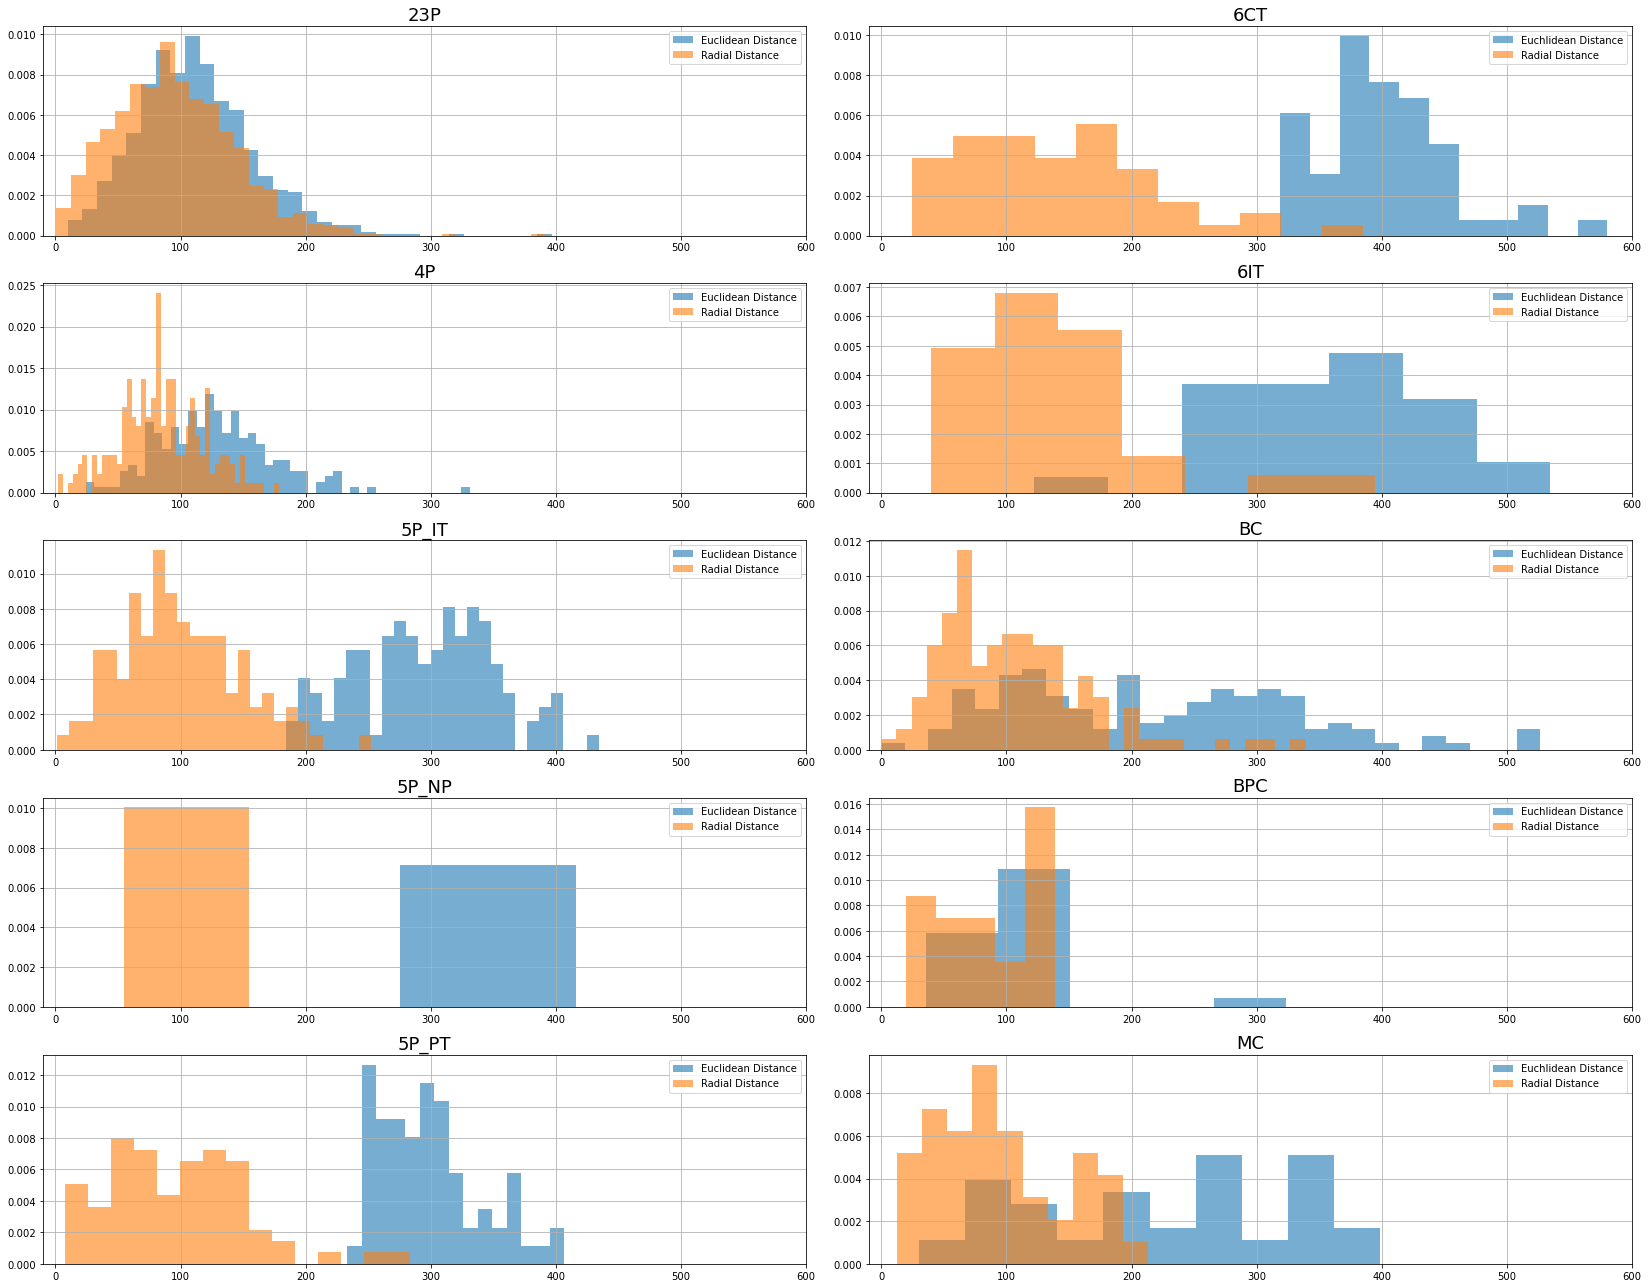

In [30]:
fig, ax = plt.subplots(5,2)
fig.set_size_inches(23,18)

nuc_types = np.unique(post_nuclei.cell_type)
for i in range(10):
    if i == 0:
        bins = int(np.ceil(len(nuc_d_type[i])/30))
        ax[i,0].hist(nuc_d_type[i],bins=bins,density=True,label='Euclidean Distance',alpha=0.6);
        ax[i,0].hist(nuc_r_type[i],bins=bins,density=True,label='Radial Distance',alpha=0.6);
        ax[i,0].set_title(nuc_types[i],fontsize=18)
        ax[i,0].grid()
        ax[i,0].legend()
        ax[i,0].set_xlim(-10,600)
    if 1 <= i < 5:
        bins = int(np.ceil(len(nuc_d_type[i])/5))
        ax[i,0].hist(nuc_d_type[i],bins=bins,density=True,label='Euclidean Distance',alpha=0.6);
        ax[i,0].hist(nuc_r_type[i],bins=bins,density=True,label='Radial Distance',alpha=0.6);
        ax[i,0].set_title(nuc_types[i],fontsize=18)
        ax[i,0].grid()
        ax[i,0].legend()
        ax[i,0].set_xlim(-10,600)
    if 5 <= i < 10:
        bins = int(np.ceil(len(nuc_d_type[i])/5))
        ax[i-5,1].hist(nuc_d_type[i],bins=bins,density=True,label='Euchlidean Distance',alpha=0.6);
        ax[i-5,1].hist(nuc_r_type[i],bins=bins,density=True,label='Radial Distance',alpha=0.6);
        ax[i-5,1].set_title(nuc_types[i],fontsize=18)
        ax[i-5,1].grid()
        ax[i-5,1].legend()
        ax[i-5,1].set_xlim(-10,600)

fig.tight_layout()
plt.show()